<a href="https://colab.research.google.com/github/yblair85/csc302/blob/main/Yulia's_Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [4]:
!pip install -U -q PyDrive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

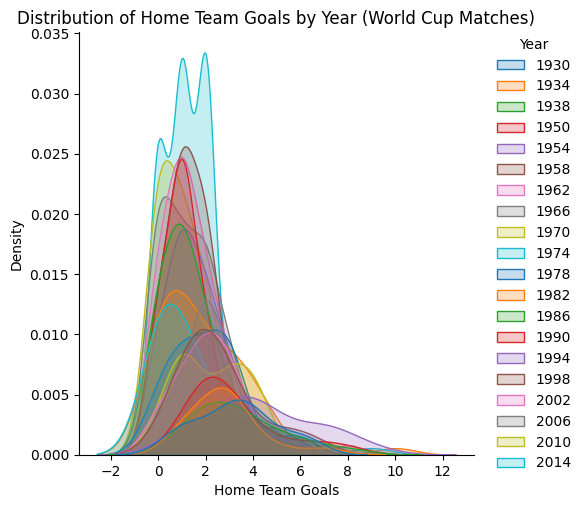

In [5]:

# Import data from WorldCupMatches.csv
data = pd.read_csv('/content/drive/My Drive/WorldCupMatches.csv')

# Check the first few rows to confirm column names (optional)
print(data.head())

# Create the displot with density curves
sns.displot(
    data=data,
    x="Home Team Goals",  # Adjust this to match your column name
    hue="Year",           # Adjust this to match your column name
    kind="kde",           # Use kernel density estimation for smooth curves
    fill=True,            # Fill under the curves
    palette="tab10"       # Distinct colors for each year
)

# Customize the plot
plt.title("Distribution of Home Team Goals by Year (World Cup Matches)")
plt.xlabel("Home Team Goals")
plt.ylabel("Density")

# Display the plot
plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

<ipython-input-6-5410aaa3e523>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


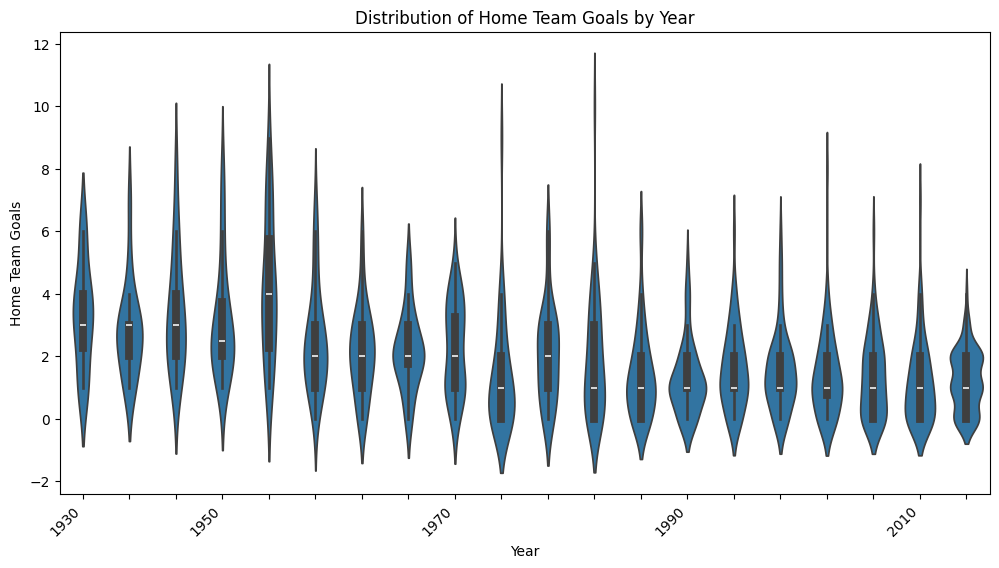

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
file_path = '/content/drive/My Drive/WorldCupMatches.csv'
data = pd.read_csv(file_path)

# Create the violin plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
sns.violinplot(x="Year", y="Home Team Goals", data=data, ax=ax)

# Customize x-axis labels to show only years ending with 0
years = data["Year"].unique()
labels = [str(year) if year % 10 == 0 else "" for year in years]
ax.set_xticklabels(labels)

# Add title and labels
plt.title("Distribution of Home Team Goals by Year")
plt.xlabel("Year")
plt.ylabel("Home Team Goals")

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha="right")  # Adjust rotation and alignment as needed

# Display the plot
plt.show()


**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [1]:
!pip install joypy

In [7]:
import joypy as jp



**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



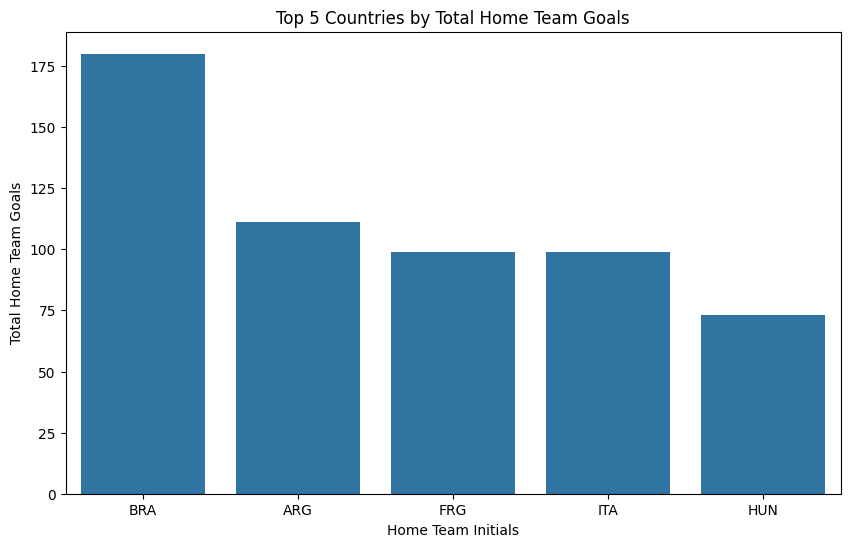

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into 'data' DataFrame

# Group by 'Home Team Initials' and sum 'Home Team Goals'
home_team_goals = data.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort by total goals in descending order and select top 5
top_5_countries = home_team_goals.sort_values(by='Home Team Goals', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Home Team Initials', y='Home Team Goals', data=top_5_countries)
plt.title('Top 5 Countries by Total Home Team Goals')
plt.xlabel('Home Team Initials')
plt.ylabel('Total Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



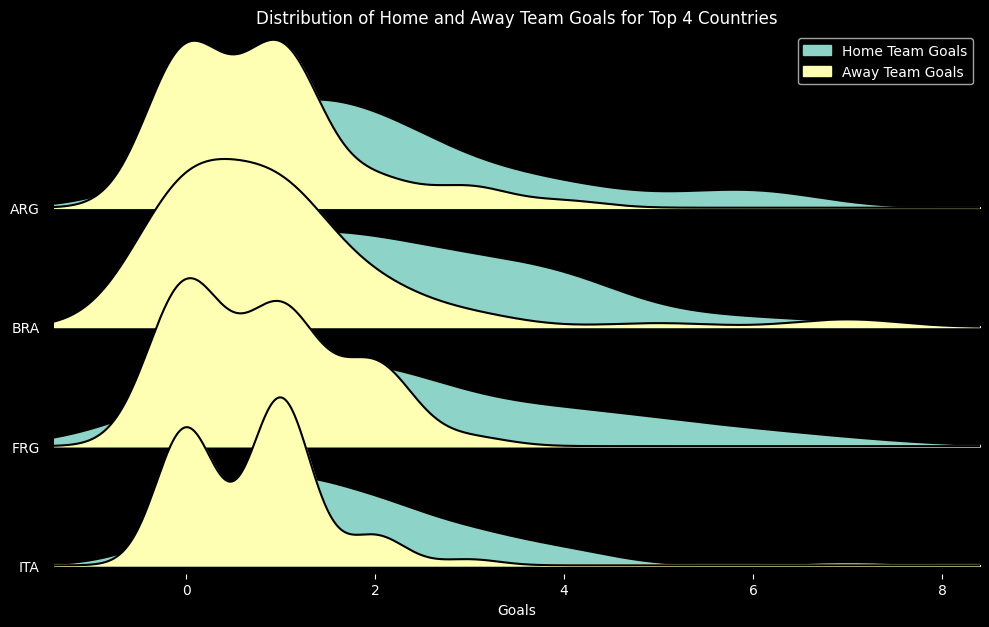

In [9]:
import joypy as jp
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into 'data' DataFrame
# and calculated 'home_team_goals' as in the previous response

# Get top 4 countries
top_4_countries = home_team_goals.sort_values(by='Home Team Goals', ascending=False).head(4)
top_4_initials = top_4_countries['Home Team Initials'].tolist()

# Extract rows for top 4 countries
filtered_data = data[data['Home Team Initials'].isin(top_4_initials)]

# Create the joyplot
plt.style.use('dark_background')  # Set dark background style
fig, axes = jp.joyplot(
    filtered_data,
    column=['Home Team Goals', 'Away Team Goals'],
    by='Home Team Initials',
    ylim='own',
    figsize=(10, 6),
    legend=True  # Show legend
)

# Customize plot
plt.title('Distribution of Home and Away Team Goals for Top 4 Countries')
plt.xlabel('Goals')
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [10]:
!pip install seaborn_qqplot

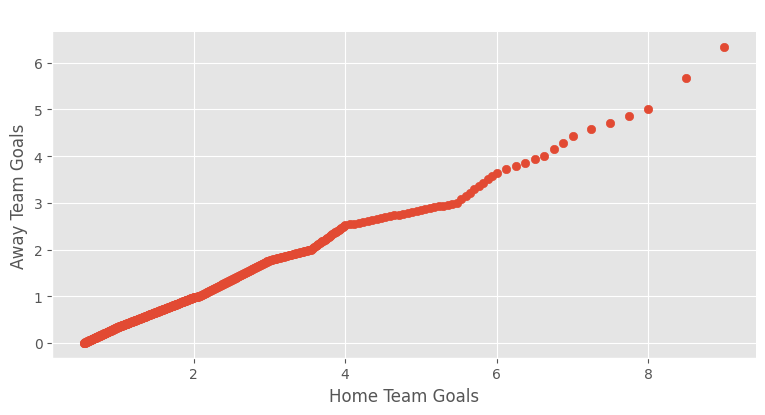

In [12]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
import matplotlib.pyplot as plt
plt.style.use('ggplot') #this is to change the color theme.

# Create the QQ plot
pplot(data, x="Home Team Goals", y="Away Team Goals", kind='qq', height=4, aspect=2)
plt.title("QQ Plot Comparing Home Team Goals and Away Team Goals")
plt.show()

#Yes the distributions agree with each other seemingly because they both follow the same path with the graph. Pretty fantastic.